
# **Capstone Project Data Science: Fraud Detection Analysis**

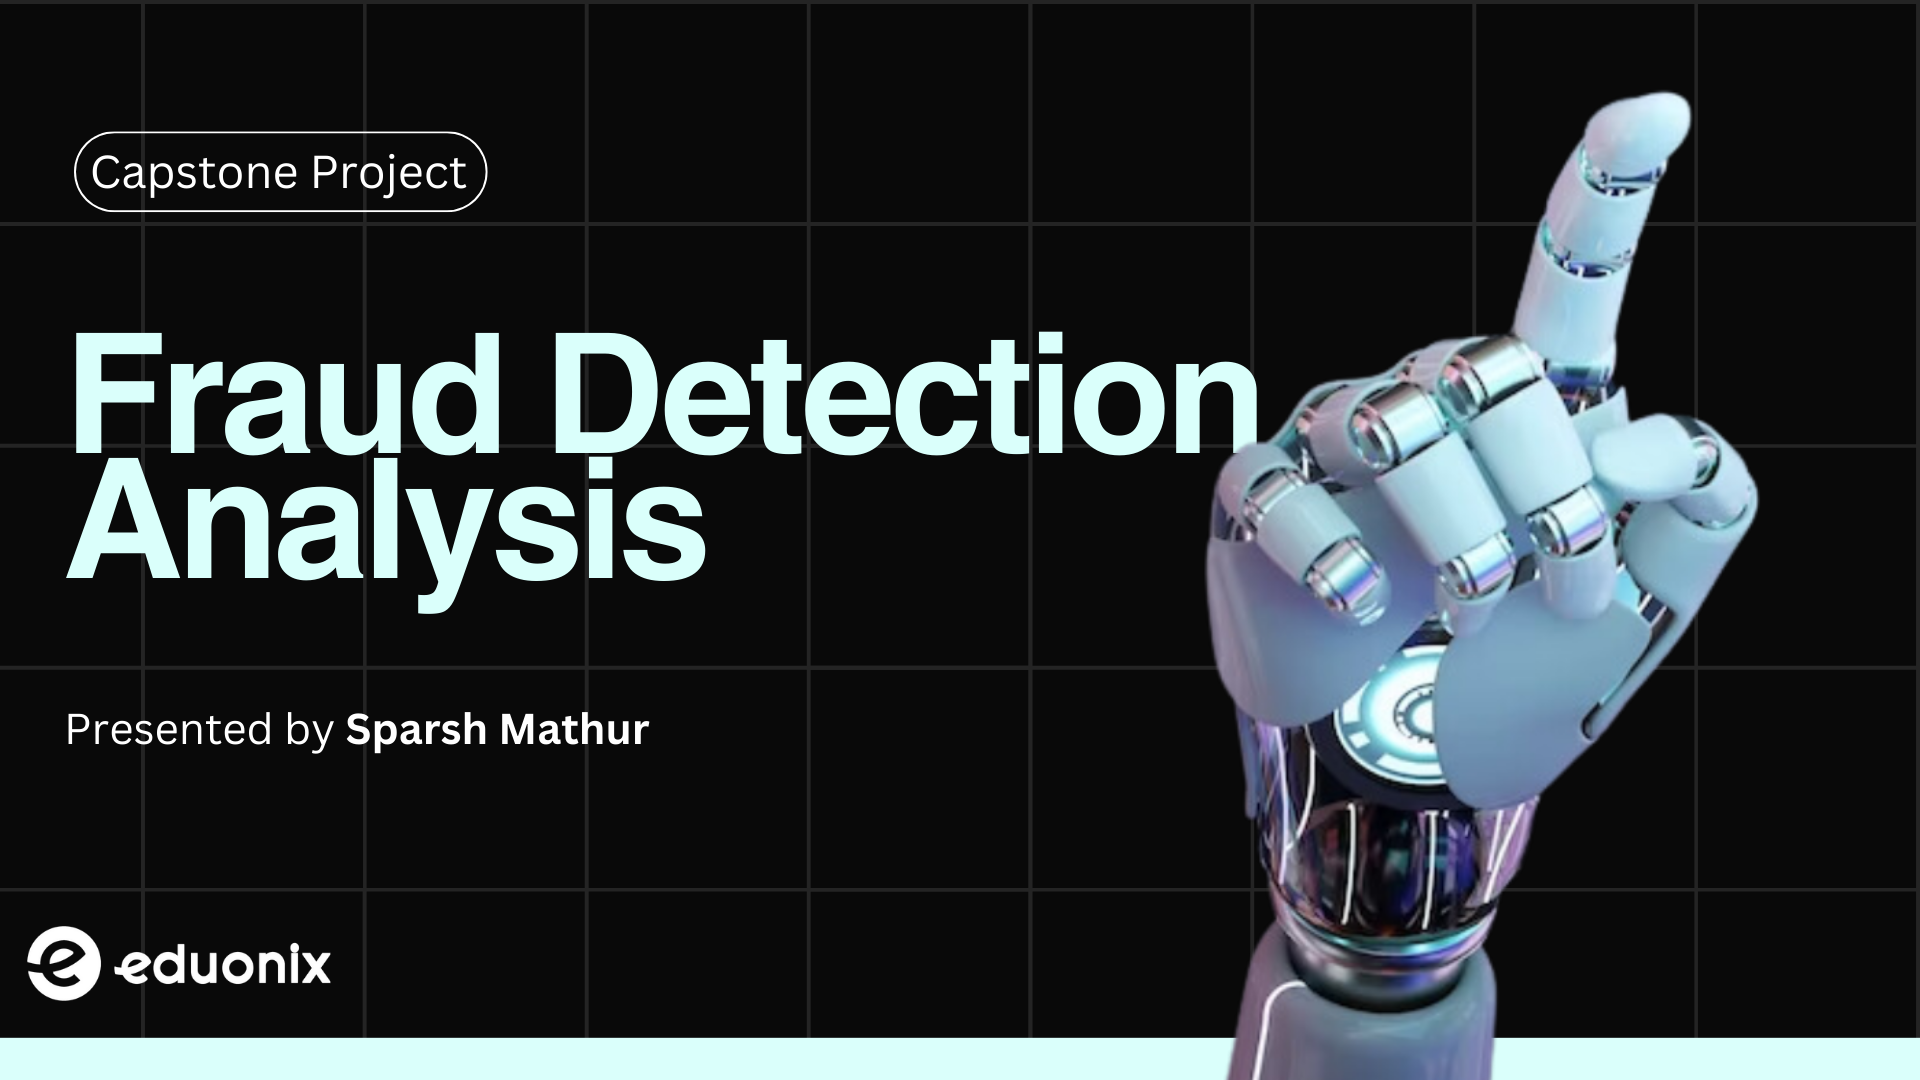

*Project Objectives and Scope*

Basically, a fraud detection model seeks to achieve the goal of accurately identifying and flagging probably fraudulent transactions while reducing false positives. This would further raise the bar for detecting anomalies or patterns that go outside the norm and thereby avoid fraudulent activities without inconveniencing any legitimate activities.

Sensitivity and precision are very critical in the area of credit card fraud detection.
Sensitivity means avoiding most of the fraudulent transactions to avoid loss in terms of finances and safeguarding the customers from such activities.

High precision ensures that very few of the transactions flagged as such are actually fraudulent in nature, thereby cutting down on false positives and consequent customer hassle and operational expense.

It is important to balance both metrics since high sensitivity results in an increased level of fraud capture but at an increased rate of false positives, while high precision decreases false positives at the possible cost of missing some frauds. An optimal class balance will maximize the accuracy of fraud detection while ensuring a positive customer experience.

Class distribution of fraud vs. non-fraud transactions in the
dataset

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'creditcard.csv'
data = pd.read_csv(file_path)

# Check the class distribution
class_distribution = data['Class'].value_counts(normalize=True)
class_distribution

,proportion
Class,
0.0,0.997144
1.0,0.002856


In the provided dataset, the class distribution is as follows:

Non-fraudulent transactions (Class 0): 99.8273%
Fraudulent transactions (Class 1): 0.1727%

**How Time Feature in the Dataset can help in the Prediction**

The 'Time' feature can contribute to fraud prediction because it identifies temporal patterns and anomalies. These include:

Temporal Patterns: Fraudulent transactions might get clustered at specific times, such as late nights or weekends. It is by analyzing the 'Time' feature that these patterns can be uncovered.

Transaction frequency: A fraudster may ring in a series of transactions within a very short period. The 'Time' feature can identify these frequency.

Anomalies in User Behavior: The regular transactions follow the user's time pattern. Deviations, such as transactions at unusual times, could be indicative of fraud.

In total, 'Time' is capable of revealing quite a lot of highly suspicious activities if looked at and effectively used in feature engineering.

**Why should the 'Amount' feature be standardized?**

It should standardize the 'Amount' feature to:

Uniform scale: This brings 'Amount' to the same scale as other features, so it doesn't dominate due to a larger scale.

Model performance enhancement: It improves distance-based algorithms, including SVM and K-means.

Faster training: This will allow faster convergence of gradient-based optimization algorithms, e.g., logistic regression or neural networks.

Manage outliers: Lessen the impact of extreme values on the target variables, resulting in more stable training.

Standardization puts all features in equal footing to the model, and thus performance is improved.

**Which features are dropped during preprocessing and why?**


During preprocessing in datasets for credit card fraud detection, some instances require features to be dropped. These include:

Unnecessary Identifiers: All features that are irrelevant and do not contribute to prediction should be dropped—for instance, unique transaction IDs or, if present, a cardholder name.

Redundant Features: If some features are just perfectly correlated to others, they add no new information and hence shall be removed.

Irrelevant Features: Features that do not have much to offer in terms of prediction of fraud, for example, metadata columns, should be removed.

Let's take a look at our dataset and try to find out if there are any irrelevant features.

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'creditcard.csv'
data = pd.read_csv(file_path)

# Inspect the dataset
print(data.info())

# Drop any unnecessary features
# After inspection we have found that there are no unnecessary coloumns
# Lets look at an example of dropping columns if they existed
# data.drop(['TransactionID', 'CustomerName'], axis=1, inplace=True)

# Verify the changes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55551 entries, 0 to 55550
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    55551 non-null  int64  
 1   V1      55551 non-null  float64
 2   V2      55551 non-null  float64
 3   V3      55551 non-null  float64
 4   V4      55551 non-null  float64
 5   V5      55551 non-null  float64
 6   V6      55551 non-null  float64
 7   V7      55551 non-null  float64
 8   V8      55551 non-null  float64
 9   V9      55551 non-null  float64
 10  V10     55551 non-null  float64
 11  V11     55551 non-null  float64
 12  V12     55551 non-null  float64
 13  V13     55551 non-null  float64
 14  V14     55551 non-null  float64
 15  V15     55550 non-null  float64
 16  V16     55550 non-null  float64
 17  V17     55550 non-null  float64
 18  V18     55550 non-null  float64
 19  V19     55550 non-null  float64
 20  V20     55550 non-null  float64
 21  V21     55550 non-null  float64
 22

**How does Gaussian Naive Bayes handle continuous features?**

Gaussian Naive Bayes treats continuous features under the assumption that the continuous values associated with each class are distributed according to a Gaussian, or normal, distribution. Here is how it goes:

Assumption of normality: Both in the assumption and in practice, the model assumes the following: Continuous features in the data follow a Gaussian distribution for each class label.

Parameter Estimation: Gaussian Naive Bayes estimates the mean and standard deviation of feature values for a given class.

Probability: To calculate probability, it uses these parameters of a given feature value, x for a class c, using the Gaussian probability density function.

Prediction: During prediction, it multiplies these likelihoods with the prior probabilities of each class and selects the class with the highest posterior probability.



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer  # Import SimpleImputer for handling missing values

# Load the dataset
file_path = 'creditcard.csv'
data = pd.read_csv(file_path)

# Assuming the target variable is 'Class' and the features are all other columns
X = data.drop('Class', axis=1)
y = data['Class']

# Handle missing values in the features
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X)) # Impute and convert back to DataFrame
X_imputed.columns = X.columns # Restore column names

# Handle missing values in the target variable - if any, but ensure integer labels
imputer = SimpleImputer(strategy='most_frequent') # Use most frequent for classification targets
y_imputed = pd.Series(imputer.fit_transform(y.values.reshape(-1, 1)).ravel().astype(int)) # Impute, reshape, and convert to integers

# Split the dataset AFTER imputation of features and target
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9850354943233818


Step 1: Upload the dataset: read data into a DataFrame.

Step 2: Preparation of data: separate the features and the target variable.

Step 3: Data split: divide the sample data into training and testing data.

Step 4: Model initialization: create a GaussianNB instance.

Step 5: Model training: fit the selected model for training data.

Step 6: Predict on testing/evaluate the model.

**Calculating Sensitivity and Precision**

*Sensitivity (Recall)*

Definition: The proportion of actual positive cases (fraudulent transactions) that are correctly identified by the model.
Formula:

Sensitivity=True Positives (TP) / True Positives (TP)+False Negatives (FN)

*Precision*

Definition: The proportion of predicted positive cases (flagged as fraudulent) that are actually positive.
Formula:

Precision=True Positives (TP) / True Positives (TP)+False Positives (FP)
​

**Metrics to Evaluate Model Performance**

*Accuracy*

Definition: The proportion of total predictions (both positive and negative) that are correct.
Formula:

Accuracy=True Positives (TP)+True Negatives (TN)/Total Predictions (TP + TN + FP + FN)

​Limitation: In imbalanced datasets, accuracy can be misleading as it may be high even if the model is not performing well on the minority class (fraud).

*F1 Score*

Definition: The harmonic mean of precision and sensitivity, providing a single metric that balances both.
Formula:
𝐹1=2((Precision×Sensitivity)/(Precision+Sensitivity))

​Interpretation: Useful when you need a balance between precision and recall, especially in imbalanced datasets.

*Area Under the ROC Curve (AUC-ROC)*

Definition: Measures the model's ability to distinguish between classes.
Interpretation: A higher AUC indicates better model performance. It considers the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity).

*Confusion Matrix*

Definition: A matrix showing the count of true positives, true negatives, false positives, and false negatives.
Interpretation: Helps in understanding the types of errors the model is making.

*Precision-Recall Curve*

Definition: Plots precision against recall for different threshold values.
Interpretation: Useful for evaluating the performance of models on imbalanced datasets.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve

# Assuming y_test are the true labels and y_pred are the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate predicted probabilities
y_pred_proba = gnb.predict_proba(X_test)  # Get predicted probabilities

roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])


print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")

Confusion Matrix:
[[39772   581]
 [   24    52]]
Accuracy: 0.9850354943233818
Precision: 0.08214849921011058
Sensitivity (Recall): 0.6842105263157895
F1 Score: 0.1466854724964739
AUC-ROC: 0.9176905258462489


Key Findings: Performance metrics and confusion matrix are presented as a means of revealing the model's effectiveness in fraud detection.

Threshold Impact: Lower threshold increases recall but decreases precision; raising threshold increases precision but decreases recall.

Optimal threshold: This will depend on how you would like to balance precision vs. recall.

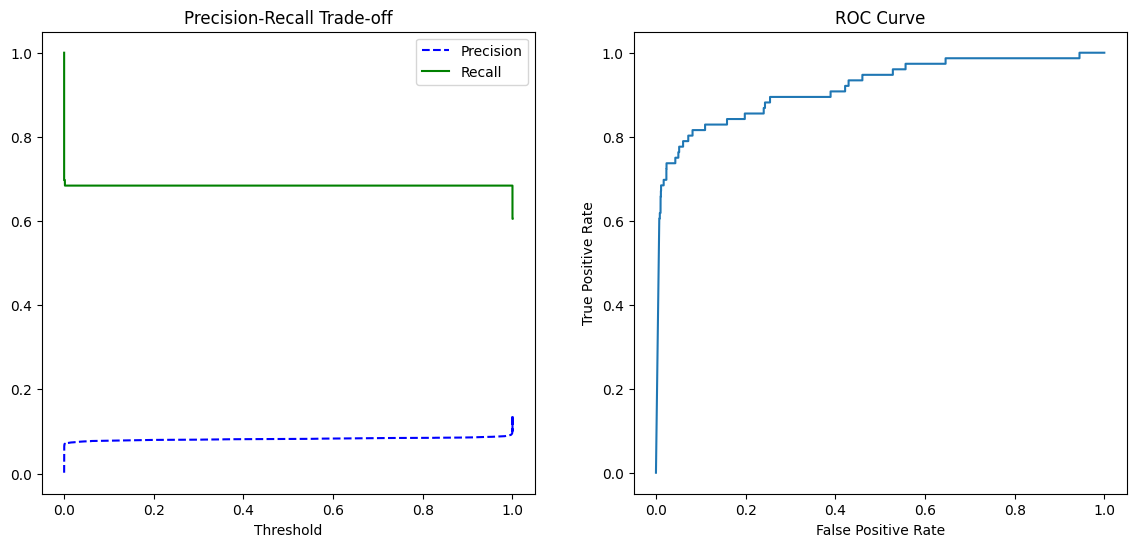

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

# Calculating the Precision-Recall and ROC curves
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_pred_proba[:, 1])
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba[:, 1])

# Plotting Precision-Recall Curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(thresholds_pr, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds_pr, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.title("Precision-Recall Trade-off")

# Plotting ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

plt.show()


Naive Bayes Limitations on Fraud Detection

1. **Independence Assumption**: Features are considered to be independent, which in most of the cases is almost not true.
2. **Gaussian Assumption**: It assumes continuous features are normally distributed, which at times may not hold.
3. **Class Imbalance**: It has issues related to class imbalance; that's when instances of fraud cases are very few as compared to non-fraud cases.
4. **Noise Sensitivity**: Noisy data and outliers often lead to misclassification.

### Better Algorithms for Fraud Detection

1. **Logistic Regression**:
- Handles binary classification very well.
   - Can deal with imbalanced data using class weights.

2. **Random Forests**:
   - Handles feature interactions.
   - Reduces overfitting by averaging many trees together.

3. **Gradient Boosting Machines (GBM)**:
   - Sequentially corrects previous models for their errors.
   - Does well with imbalanced datasets.

4. **Support Vector Machines (SVM)**:
   - Functions very well on high-dimensional data.
Class weights can balance class-imbalanced data.

### Summary
- **Naive Bayes Limitations:** Independence and Gaussian assumptions, class imbalance, sensitivity to noise.
Better Algorithms: Logistic, Random Forest, GBM, SVM for improved performance.

**Integrating the Model into a Real-Time Fraud Detection System**

1. **Model Deployment**:
   - **API Endpoint**: It would be run as a REST API endpoint with Flask or FastAPI.
   - **Cloud Services**: It would be deployed serverlessly with AWS Lambda, Google Cloud Functions, or Azure Functions.
   - **Scalability**: Load balancing  and auto-scaling in case of high traffic.

2. **Real-Time Data Processing**:
- **Data Ingestion**: Streaming of transactions data using Apache Kafka or AWS Kinesis.
   - **Feature Engineering**: Real-time features extraction with stream processing tools like Apache Flink or Spark Streaming.

3. **Prediction Pipeline**:
   - **Prediction Service**: REST receives transaction data, preprocesses it, and returns fraud prediction.
- **Integration with transaction processing system**: mark or block transactions based on the model's output.

4. **Monitoring and Maintenance**
   - **Performance Monitoring**: accuracy, precision, and recall can be tracked using Prometheus and Grafana.
   - **Model Update**: as fraudulent patterns change over time, it would need periodic retraining on new data.

### Ethics of Deploying a Fraud Detection Model

1. **Fairness and Bias**: Bias Detection: From time to time, perform bias detection on model outcomes against the protected groups. Bias Mitigation: Utilize techniques of re-sampling, re-weighting, or fairness-aware algorithms that bring down bias.
2. **Transparency and Accountability**: Explainability: Offer reasons for flagging transactions by applying explainable AI tools like LIME or SHAP.
**Human Oversight**: Provide for a review process to enable flagged transactions to be checked manually.

3. **Privacy and Data Security**:
- **Data Encryption**: The transaction data is to be encrypted at rest and in transit.
- **Access Control**: Apply the principle of least privilege through strict access controls, with corresponding audit logs of accesses to data.
- **Compliance**: Ensure adherence to GDPR, CCPA, and other legislation relating to data protection.

4. **Impact on Users:
- **False Positives**: Reduce the false positive rate, which hassles customers by threshold tuning and many more.
 - **Remediation**: Establish an explicit, expedited pathway for users to dispute and easily remedy false fraud alerts.

### Summary

- **Integrate**: Deploy the model via API, using streaming platforms for real-time data. This is a Prediction Service. Ensure it scales, is monitored.
- **Ethical Concerns**: Bring down bias and check for bias regularly; offer explainability; make sure the data is secure; comply with regulations; reduce hassle for the user; and provide remediation processes.

**Steps to Implement Naive Bayes in Python**

*Import Libraries:*

Load necessary libraries related to data handling, model training, and evaluation.

*Load Dataset:*

Load the dataset into a pandas DataFrame.

*Data Preprocessing:*

Handle missing values and encode categorical variables if necessary; standardize/normalize features.

*Split Dataset:*

Split the dataset into training and testing sets.

*Train Naive Bayes Model:*

Initialize the Naive Bayes model and train it with training data.

*Evaluate Model:*

Now, make some predictions on this test set, and then measure model performance with metrics such as accuracy, precision, recall, and the F1 score.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = 'creditcard.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
X = data.drop('Class', axis=1)
y = data['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluate Model
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.85      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy: 0.9780438420935594
Precision: 0.0583756345177665
Recall: 0.8455882352941176
F1 Score: 0.10921177587844254


**Cross-Validation for Model Improvement**

Cross-validation is the technique through which the dataset can be divided into n subsets, so that the model is trained and tested n times to better estimate performance without overfitting.

K-Fold Cross-Validation

1. Make a k-fold split of the dataset.

2. Train the model k times by taking each fold as one test fold, and the remaining as training datasets.

3. Take the average of the metrics estimated by these iterations.

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize Naive Bayes Model
nb_model = GaussianNB()

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(nb_model, X_scaled, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")


Cross-Validation Accuracy Scores: [0.97594888 0.97810821 0.97975808 0.97387686 0.98107477]
Mean Cross-Validation Accuracy: 0.977753360871155


**Advantages of Cross-Validation**

*More Confident Model Performance Estimates:*

The procedure gives a more realistic model performance by returning the average value across the folds.

*Low Risk of Overfitting:*

It helps the model generalize better since it is trained and tested on different subsets of data.

*Model Tuning:*

This helps in choosing the best model with hyper-parameters by comparing the cross-validated measures of performance.

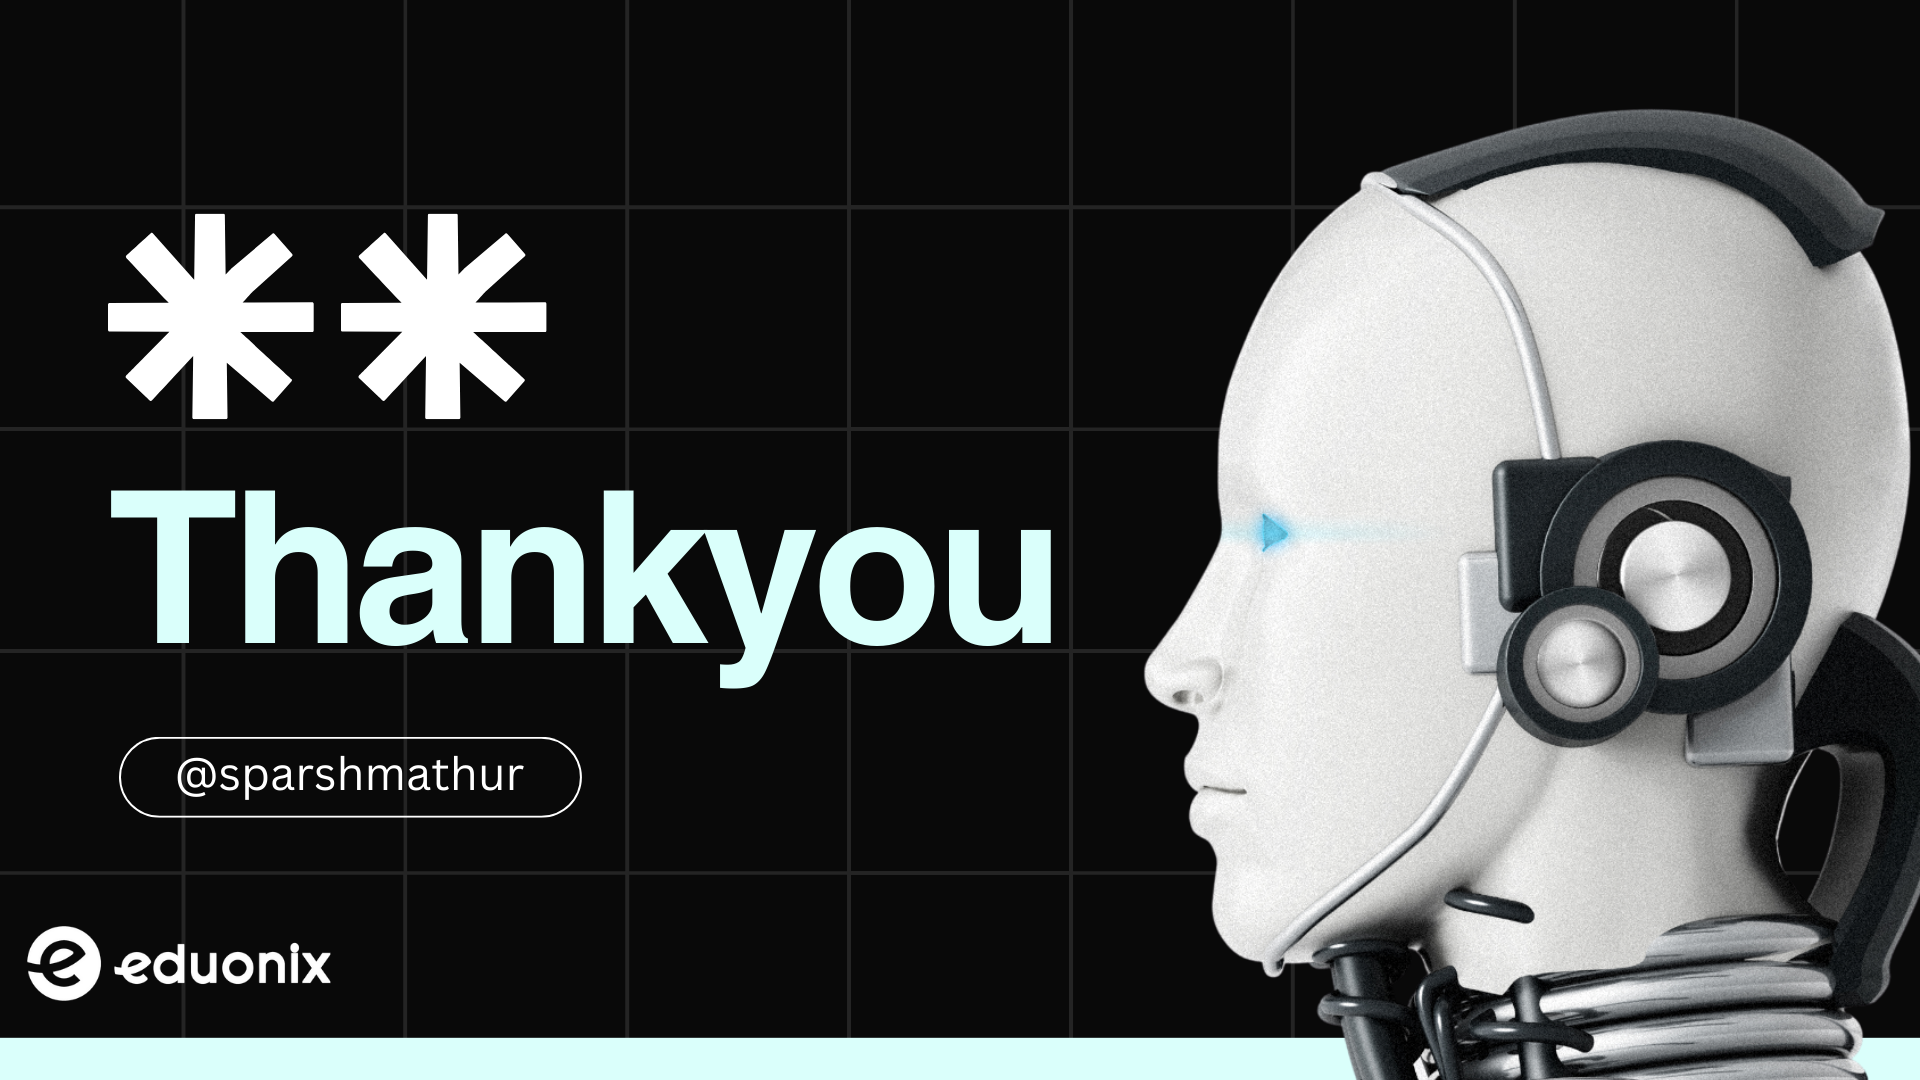